# 순환 신경망으로 욕설을 분류하기 위해 데이터를 분석하기

## 모듈 임포트

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 데이터 전처리

In [ ]:
def split_the_list_original(input_ls : list) -> list:
    two_dimensional_paramls = []
    for input_string in input_ls:
        appendls = list(str(input_string).split())
        two_dimensional_paramls.append(appendls)
    return two_dimensional_paramls

In [ ]:
def return_to_split_list(input_ls : list) -> list:
    """
    문자열로 입력된 리스트를 공백기준으로 자르는 함수입니다.
    :param input_ls:
    :return:
    """
    two_dimensional_paramls = split_the_list_original(input_ls)
    outls = []
    for index_string_list in two_dimensional_paramls:
        for index_string in index_string_list:
            outls.append(str(index_string))
    return outls

In [ ]:
def one_hot_encoding(input_ls : list) -> list:
    """
    원핫 인코딩을 사용하여 단어를 인코딩
    :param input_ls:
    :return:
    """
    dict_loop_index = 0
    dict_loop = {}
    set_input_ls = set(return_to_split_list(input_ls))
    for st in set_input_ls:
        dict_loop[f"{st}"] = dict_loop_index
        dict_loop_index += 1
    string_ls = split_the_list_original(input_ls)
    outls = []
    output = []
    for i in string_ls:
        for j in i:
            outls.append(dict_loop[j])
        output.append(outls)
        outls = []
    return output

In [ ]:
df = pd.read_csv("/content/2runo\'s-swear.csv")

In [ ]:
df.head()

,Unnamed: 0,sentence,target
0,0,좌배 까는건 ㅇㅂ,1
1,1,집에 롱 패딩만 세 개다. 10년 더 입어야지 ㅋㅋ,0
2,2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,3,세탁이라고 봐도 된다,0
4,4,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1


In [ ]:
sentence = list(df['sentence'])
target = list(map(int, list(df['target'])))

In [ ]:
sentence = one_hot_encoding(sentence)

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(
    sentence, target, test_size = 0.2, random_state = 42
)

In [ ]:
lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

7.454506437768241 5.0


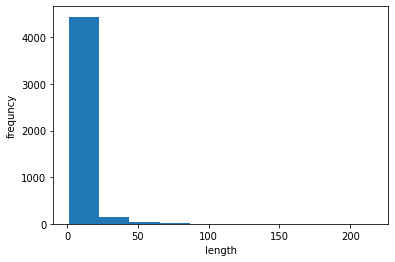

In [ ]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequncy')
plt.show()